Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('temperature.csv', index_col='Date', parse_dates=['Date'])
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [3]:
# To display all columns 
pd.set_option('display.max_columns', None)

In [4]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null

### There are 7752 rows and 24columns

In [5]:
df.shape

(7752, 24)

In [6]:
# Drop any nan values if any
df.dropna(inplace = True)

In [7]:
# To check any null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

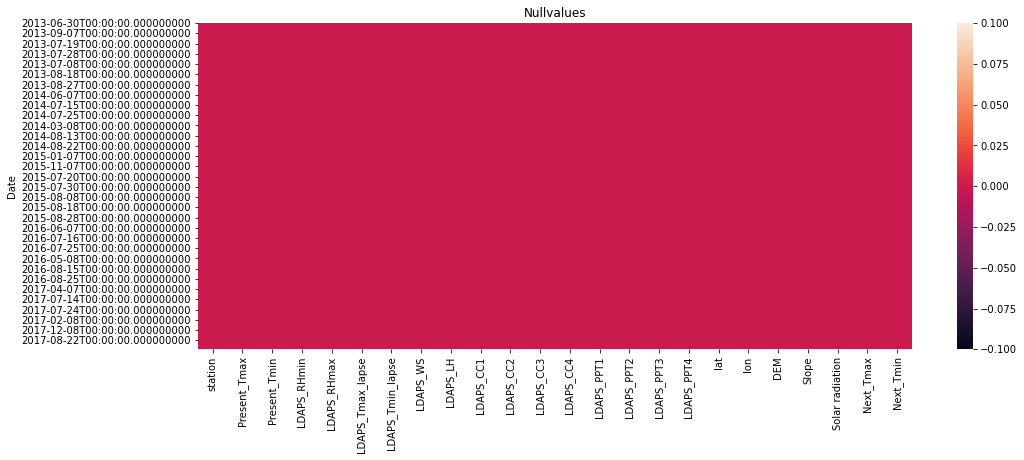

In [8]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

There are no null values in the above dataset

In [9]:
#describing the descriptive statastics of numerical values
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000  
mean     61.918136     1.259755      5343.724208    30.241526    22.910820  
std      54.323529     1.372748       429.782561     3.111807     2.482256  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      5001.485717    28.200000    21.300000  
50%      45.716000     0.618000      5441.987305    30.400000    23.100000  
75%      59.832400     1.767800      5729.485840    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000

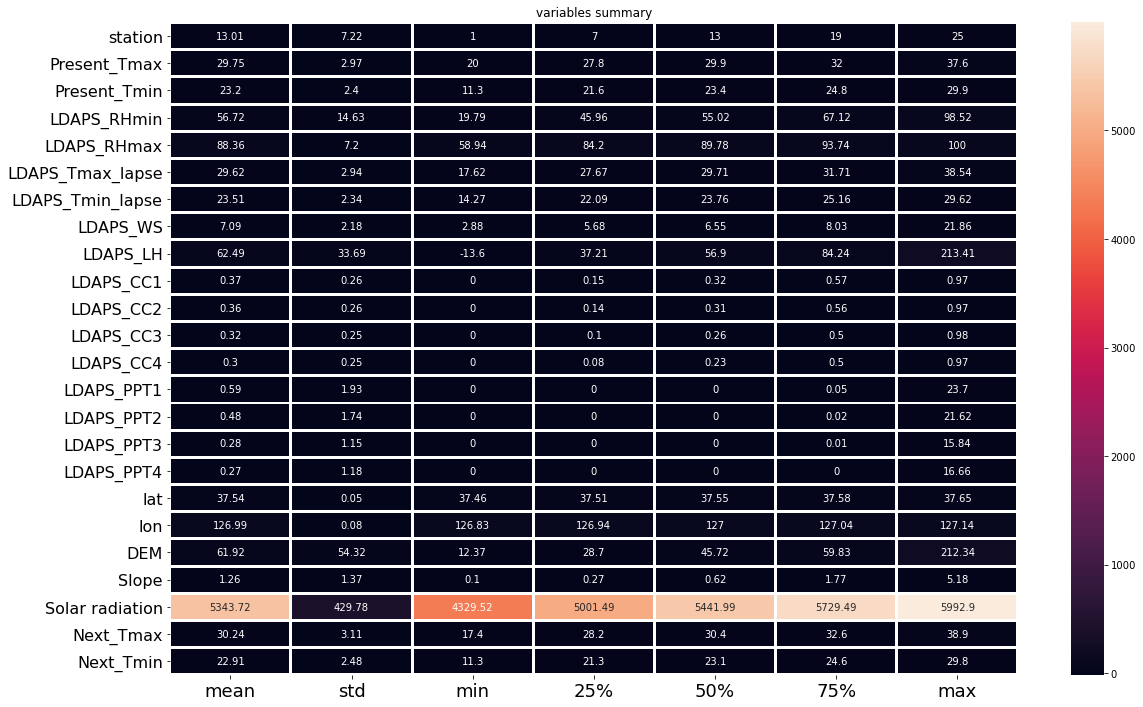

In [10]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

In [11]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
Date                                                                 
2013-06-30   0.233947   0.203896   0.161697   0.130928         0.0   
2013-06-30   0.225508   0.251771   0.159444   0.127727         0.0   
2013-06-30   0.209344   0.257469   0.204091   0.142125         0.0   
2013-06-30   0.216372   0.226002   0.161157   0.134249         0.0   
2013-06-30   0.151407   0.249995   0.178892   0.170021         0.0   

            LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
Date                                                                         
2013-06-30         0.0         0.0         0.0  37.6046  126.991  212.3350   
2013-06-30         0.0         0.0         0.0  37.6046  127.032   44.7624   
2013-06-30         0.0         0.0         0.0  37.5776  127.058   33.3068   
2013-06-30         0.0         0.0         0.0  37.6450  127.022   45.7160   
2013-06-30         0.0         0.0         0.0  37.5507  127.135   35.0380   

             Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                       
2013-06-30  2.7850      5992.895996       29.1       21.2  
2013-06-30  0.5141      5869.312500       30.5       22.5  
2013-06-30  0.2661      5863.555664       31.1       23.9  
2013-06-30  2.5348      5856.964844       31.7       24.3  
2013-06-30  0.5055      5859.552246       31.2       22.5

In [12]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

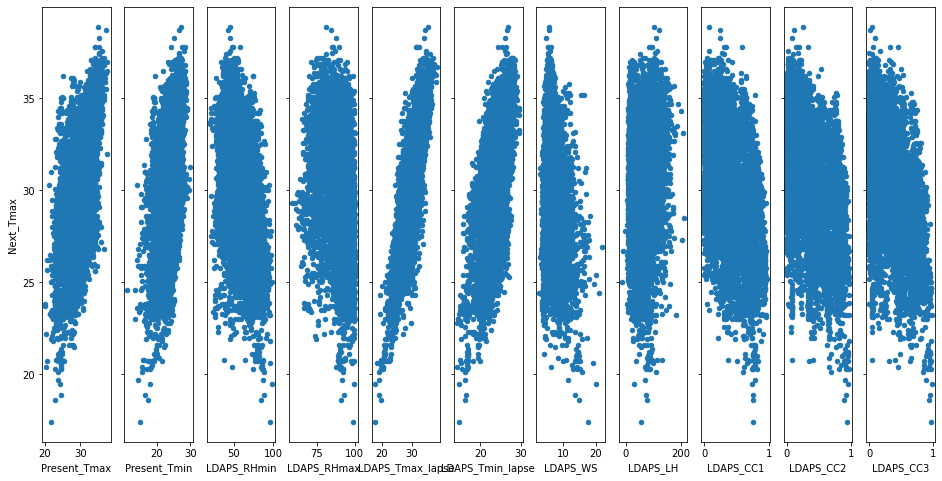

In [13]:
# visualisatjion of  Next_Tmax with other columns
fig,axs  = plt.subplots(1,11,sharey = True)
df.plot(kind='scatter',x='Present_Tmax',y='Next_Tmax',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='Present_Tmin',y='Next_Tmax',ax=axs[1])
df.plot(kind='scatter',x='LDAPS_RHmin',y='Next_Tmax',ax=axs[2])
df.plot(kind='scatter',x='LDAPS_RHmax',y='Next_Tmax',ax=axs[3])
df.plot(kind='scatter',x='LDAPS_Tmax_lapse',y='Next_Tmax',ax=axs[4])
df.plot(kind='scatter',x='LDAPS_Tmin_lapse',y='Next_Tmax',ax=axs[5])
df.plot(kind='scatter',x='LDAPS_WS',y='Next_Tmax',ax=axs[6])
df.plot(kind='scatter',x='LDAPS_LH',y='Next_Tmax',ax=axs[7])
df.plot(kind='scatter',x='LDAPS_CC1',y='Next_Tmax',ax=axs[8])
df.plot(kind='scatter',x='LDAPS_CC2',y='Next_Tmax',ax=axs[9])
df.plot(kind='scatter',x='LDAPS_CC3',y='Next_Tmax',ax=axs[10])



<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

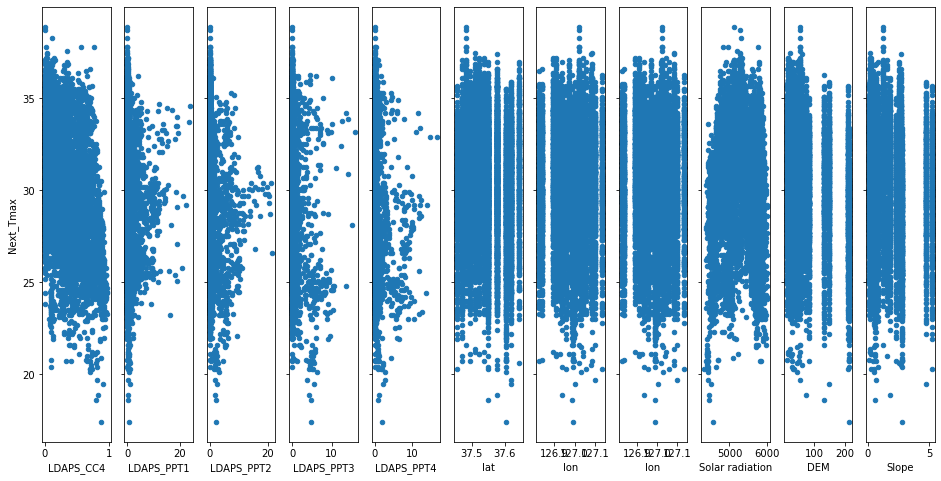

In [14]:
# visualisatjion of  Next_Tmax with other columns
fig,axs  = plt.subplots(1,11,sharey = True)
df.plot(kind='scatter',x='LDAPS_CC4',y='Next_Tmax',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='LDAPS_PPT1',y='Next_Tmax',ax=axs[1])
df.plot(kind='scatter',x='LDAPS_PPT2',y='Next_Tmax',ax=axs[2])
df.plot(kind='scatter',x='LDAPS_PPT3',y='Next_Tmax',ax=axs[3])
df.plot(kind='scatter',x='LDAPS_PPT4',y='Next_Tmax',ax=axs[4])
df.plot(kind='scatter',x='lat',y='Next_Tmax',ax=axs[5])
df.plot(kind='scatter',x='lon',y='Next_Tmax',ax=axs[6])
df.plot(kind='scatter',x='lon',y='Next_Tmax',ax=axs[7])
df.plot(kind='scatter',x='Solar radiation',y='Next_Tmax',ax=axs[8])
df.plot(kind='scatter',x='DEM',y='Next_Tmax',ax=axs[9])
df.plot(kind='scatter',x='Slope',y='Next_Tmax',ax=axs[10])

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

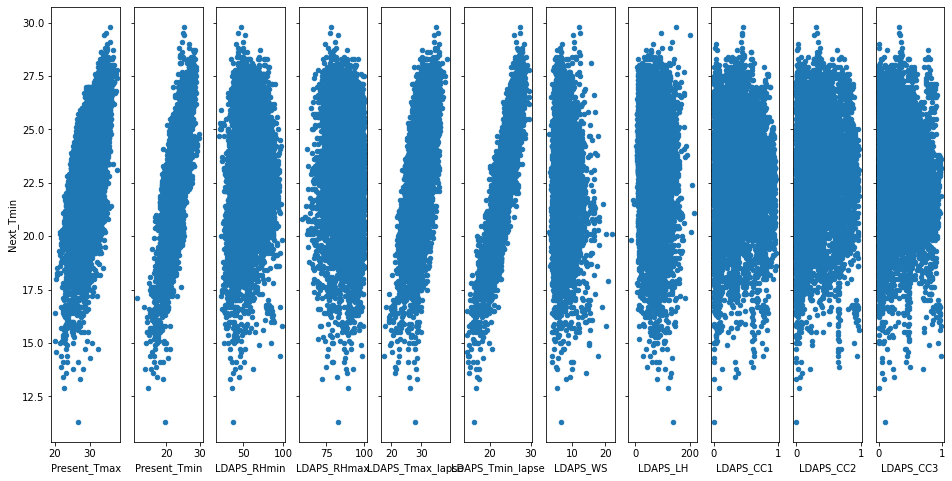

In [15]:
# visualisatjion of  Next_Tmin with other columns
fig,axs  = plt.subplots(1,11,sharey = True)
df.plot(kind='scatter',x='Present_Tmax',y='Next_Tmin',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='Present_Tmin',y='Next_Tmin',ax=axs[1])
df.plot(kind='scatter',x='LDAPS_RHmin',y='Next_Tmin',ax=axs[2])
df.plot(kind='scatter',x='LDAPS_RHmax',y='Next_Tmin',ax=axs[3])
df.plot(kind='scatter',x='LDAPS_Tmax_lapse',y='Next_Tmin',ax=axs[4])
df.plot(kind='scatter',x='LDAPS_Tmin_lapse',y='Next_Tmin',ax=axs[5])
df.plot(kind='scatter',x='LDAPS_WS',y='Next_Tmin',ax=axs[6])
df.plot(kind='scatter',x='LDAPS_LH',y='Next_Tmin',ax=axs[7])
df.plot(kind='scatter',x='LDAPS_CC1',y='Next_Tmin',ax=axs[8])
df.plot(kind='scatter',x='LDAPS_CC2',y='Next_Tmin',ax=axs[9])
df.plot(kind='scatter',x='LDAPS_CC3',y='Next_Tmin',ax=axs[10])


<AxesSubplot:xlabel='Slope', ylabel='Next_Tmin'>

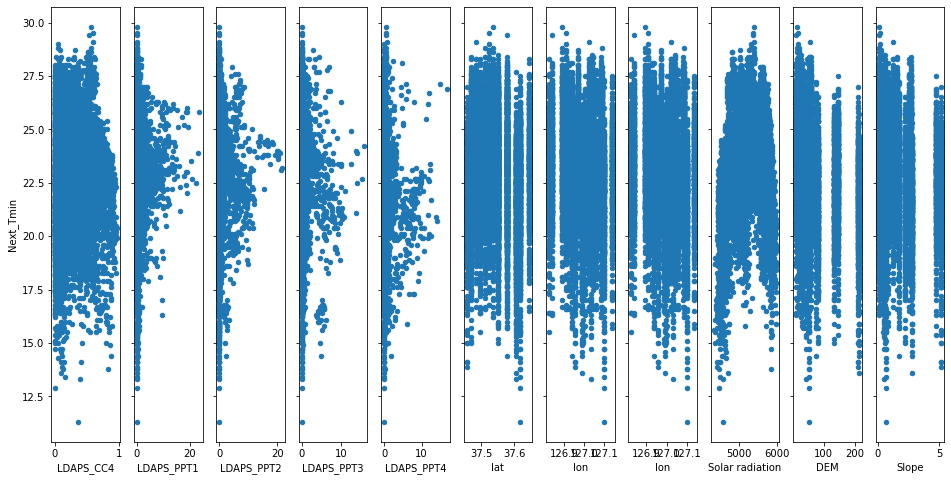

In [16]:
# visualisatjion of  Next_Tmin with other columns
fig,axs  = plt.subplots(1,11,sharey = True)
df.plot(kind='scatter',x='LDAPS_CC4',y='Next_Tmin',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='LDAPS_PPT1',y='Next_Tmin',ax=axs[1])
df.plot(kind='scatter',x='LDAPS_PPT2',y='Next_Tmin',ax=axs[2])
df.plot(kind='scatter',x='LDAPS_PPT3',y='Next_Tmin',ax=axs[3])
df.plot(kind='scatter',x='LDAPS_PPT4',y='Next_Tmin',ax=axs[4])
df.plot(kind='scatter',x='lat',y='Next_Tmin',ax=axs[5])
df.plot(kind='scatter',x='lon',y='Next_Tmin',ax=axs[6])
df.plot(kind='scatter',x='lon',y='Next_Tmin',ax=axs[7])
df.plot(kind='scatter',x='Solar radiation',y='Next_Tmin',ax=axs[8])
df.plot(kind='scatter',x='DEM',y='Next_Tmin',ax=axs[9])
df.plot(kind='scatter',x='Slope',y='Next_Tmin',ax=axs[10])

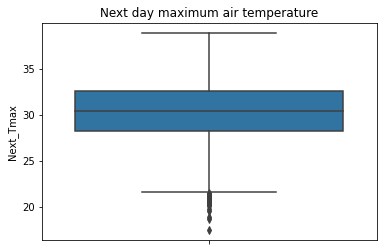

In [17]:
# checking box plot for target variable Next_Tmax.

plt.title('Next day maximum air temperature')
sns.boxplot(y = df['Next_Tmax'])
plt.show()

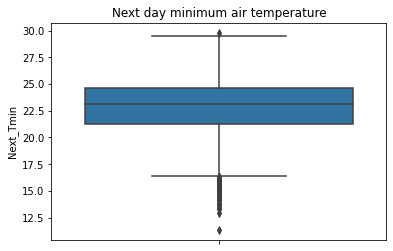

In [18]:
# checking box plot for target variable Next_Tmin.

plt.title('Next day minimum air temperature')
sns.boxplot(y = df['Next_Tmin'])
plt.show()

By observing the both target variables outliers are present

<AxesSubplot:ylabel='Density'>

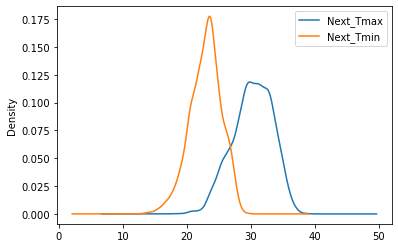

In [19]:
# checking the density of both the target variable.

df[['Next_Tmax', 'Next_Tmin']].plot(kind='density')

<Figure size 1440x360 with 0 Axes>

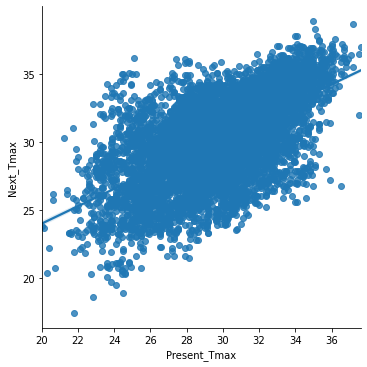

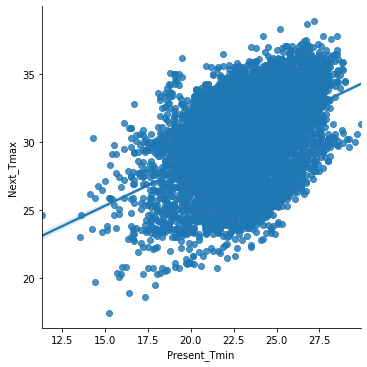

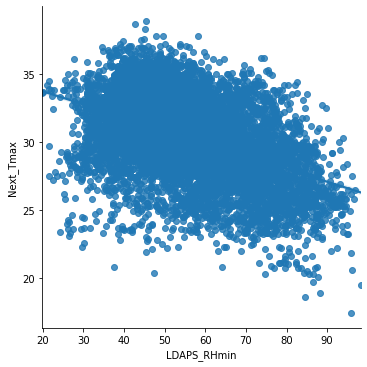

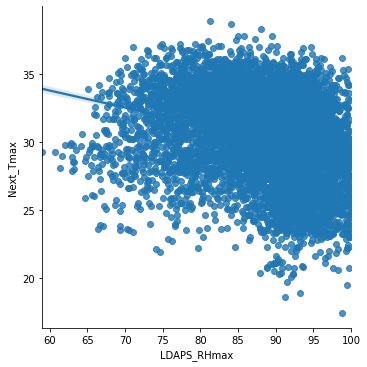

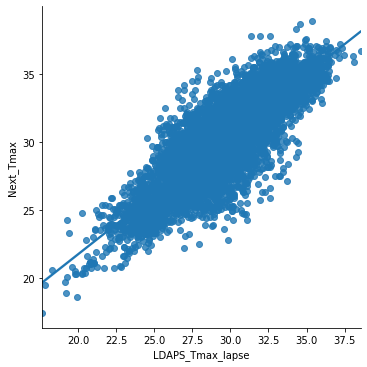

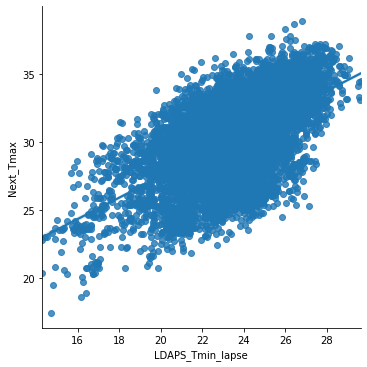

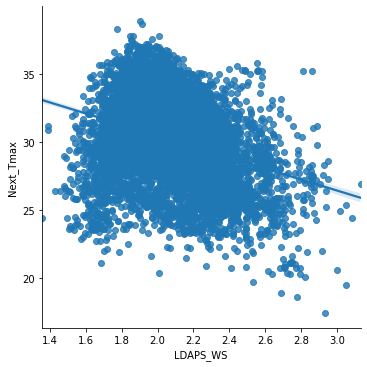

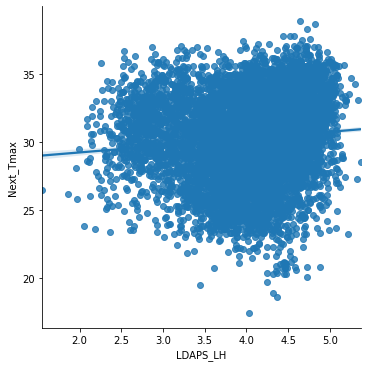

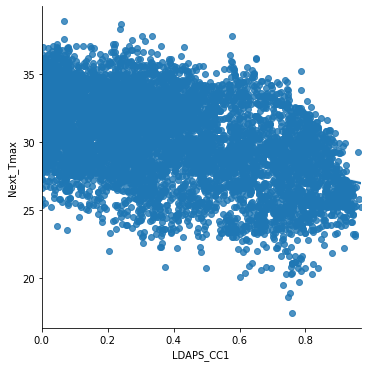

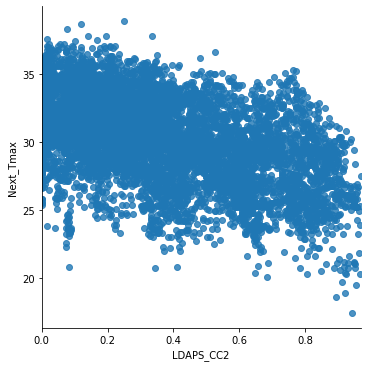

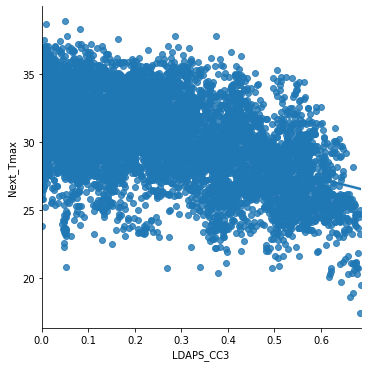

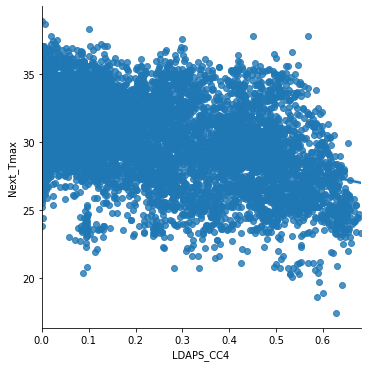

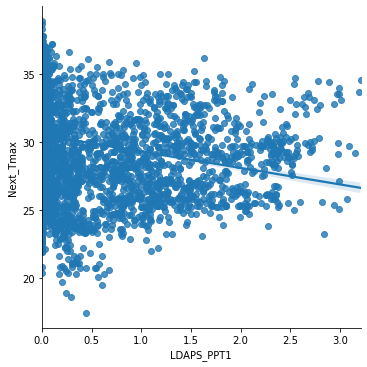

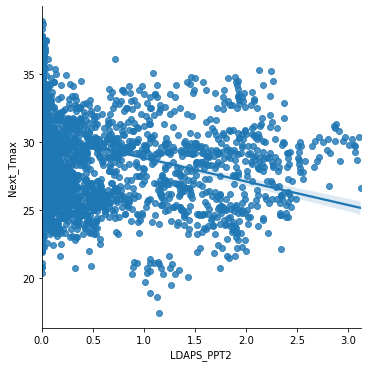

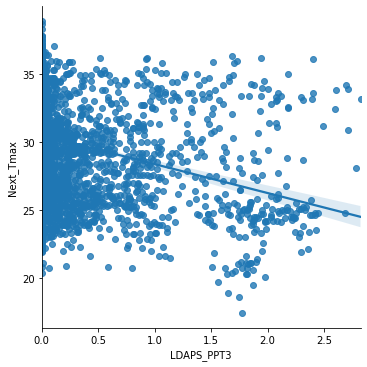

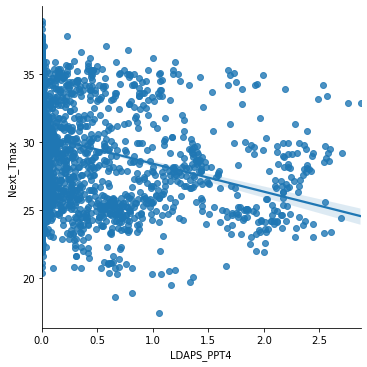

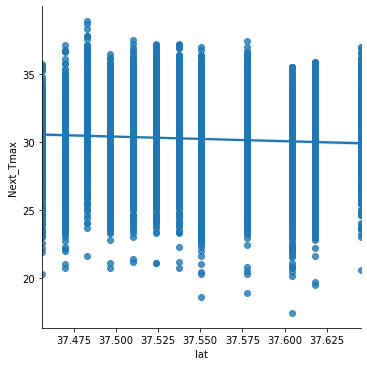

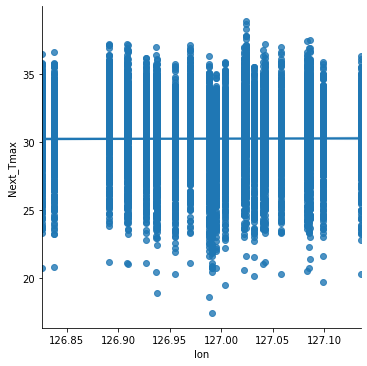

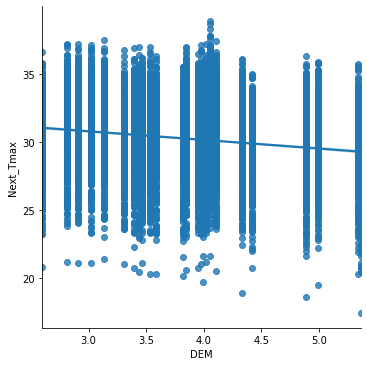

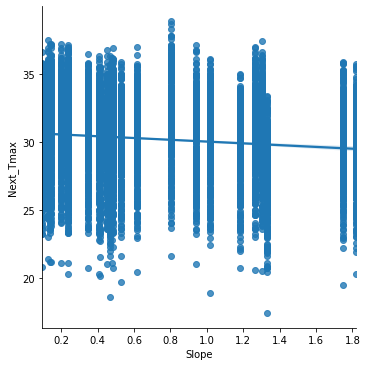

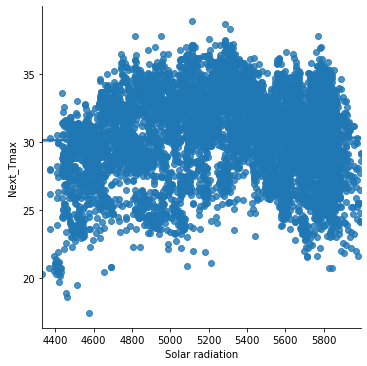

In [117]:
# this is a linear model plot.
# checking the regression line between dependent variable(Next_Tmax) and independent variables.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='Present_Tmax', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Present_Tmin', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmin', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmax', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmin_lapse', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_WS', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_LH', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC1', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC2', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC3', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC4', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT1', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT2', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT3', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT4', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='lat', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='lon', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='DEM', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Slope', y='Next_Tmax', fit_reg=True)
sns.lmplot(data=df, x='Solar radiation', y='Next_Tmax', fit_reg=True)

<Figure size 1440x360 with 0 Axes>

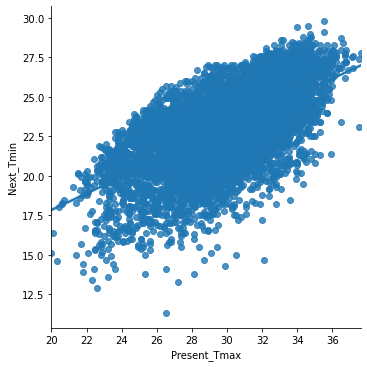

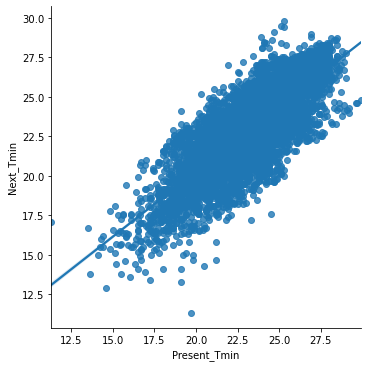

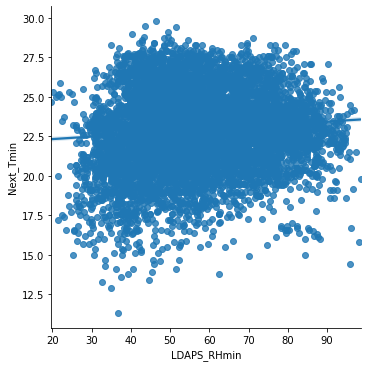

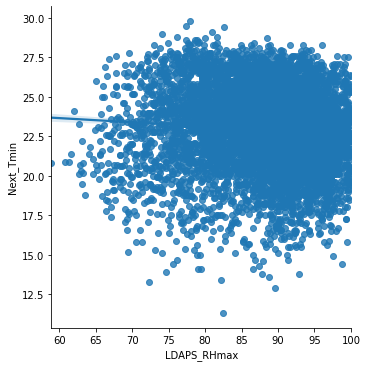

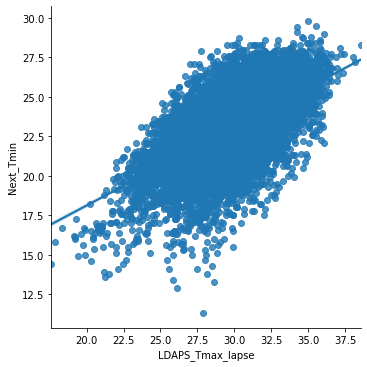

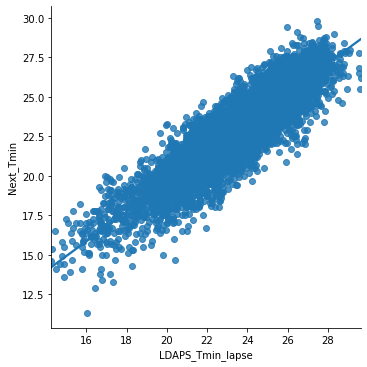

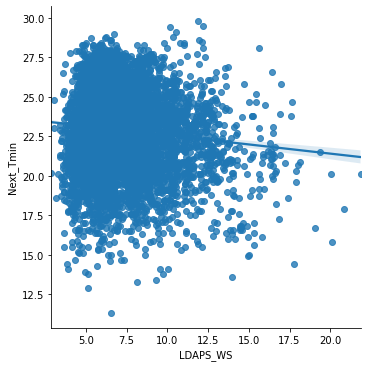

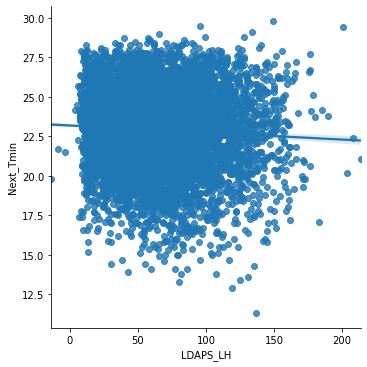

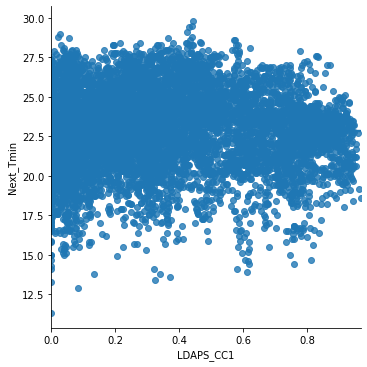

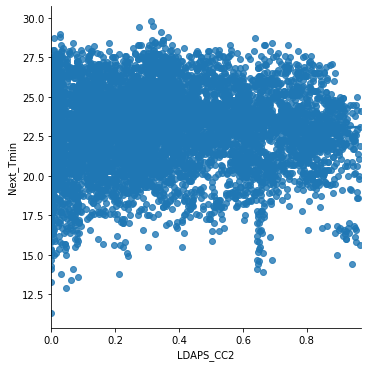

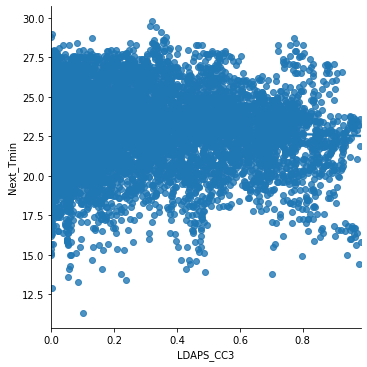

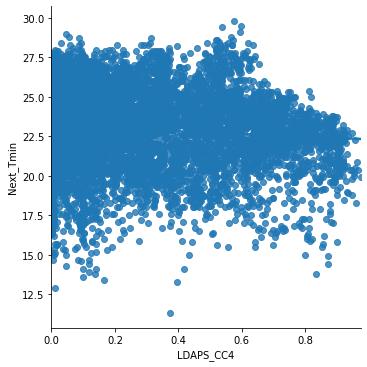

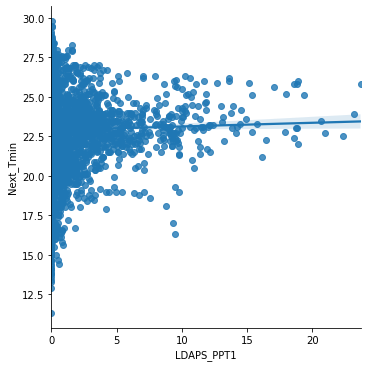

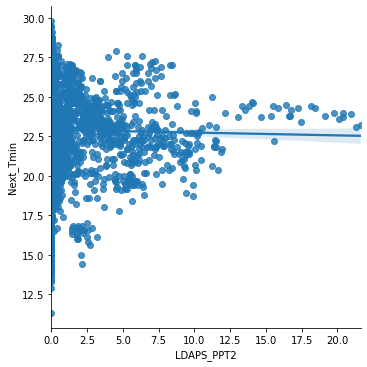

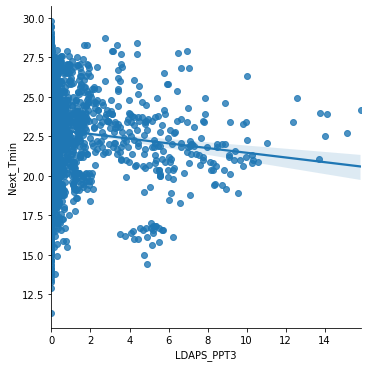

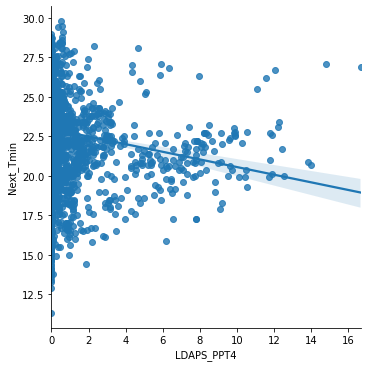

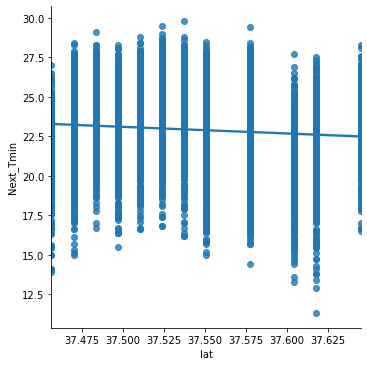

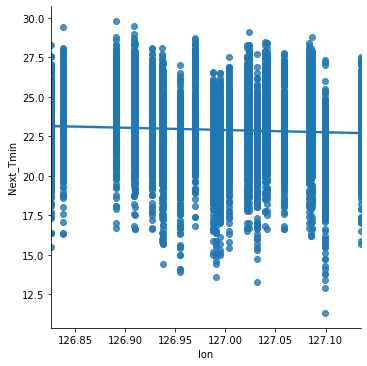

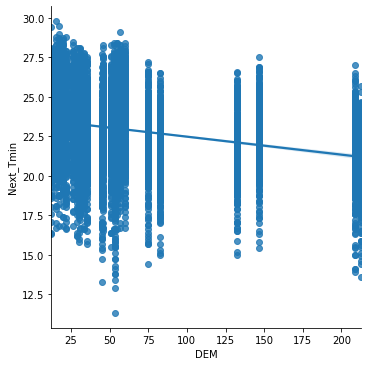

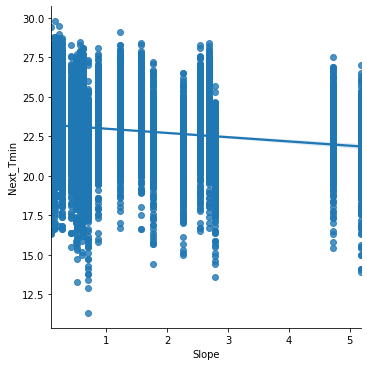

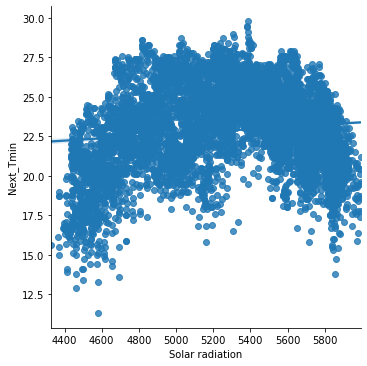

In [21]:
# this is a linera model plot.
# checking the regression line between dependent variable(Next_Tmin) and independent variable.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='Present_Tmax', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Present_Tmin', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmin', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_RHmax', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_Tmin_lapse', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_WS', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_LH', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC1', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC2', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC3', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_CC4', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT1', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT2', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT3', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='LDAPS_PPT4', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='lat', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='lon', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='DEM', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Slope', y='Next_Tmin', fit_reg=True)
sns.lmplot(data=df, x='Solar radiation', y='Next_Tmin', fit_reg=True)
           

In [118]:
# correlation 
df_cor=df.corr()
df_cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113786      0.133572    -0.068988   
Present_Tmax      0.113786      1.000000      0.615135    -0.208201   
Present_Tmin      0.133572      0.615135      1.000000     0.123097   
LDAPS_RHmin      -0.068988     -0.208201      0.123097     1.000000   
LDAPS_RHmax      -0.170089     -0.306505     -0.018172     0.577768   
LDAPS_Tmax_lapse  0.070510      0.573590      0.467801    -0.568998   
LDAPS_Tmin_lapse  0.105656      0.628525      0.772006     0.086343   
LDAPS_WS          0.010503     -0.116430     -0.020242     0.263740   
LDAPS_LH         -0.130238      0.098717     -0.022620     0.014338   
LDAPS_CC1         0.005703     -0.315793      0.085005     0.611958   
LDAPS_CC2         0.002742     -0.216305      0.090695     0.744284   
LDAPS_CC3        -0.000582     -0.140578     -0.000954     0.683261   
LDAPS_CC4         0.004968     -0.136482     -0.040916     0.513088   
LDAPS_PPT1       -0.004555     -0.154589      0.113240     0.354855   
LDAPS_PPT2       -0.010129     -0.127173      0.071549     0.495647   
LDAPS_PPT3       -0.011799     -0.133729     -0.043898     0.324315   
LDAPS_PPT4       -0.006978     -0.126505     -0.089233     0.233409   
lat              -0.239819     -0.053539     -0.081086     0.083636   
lon              -0.118928      0.007767     -0.045139    -0.077871   
DEM              -0.307504     -0.162146     -0.257037     0.076436   
Slope            -0.124083     -0.110028     -0.160169     0.108759   
Solar radiation  -0.021716     -0.021554      0.060132     0.241184   
Next_Tmax         0.108262      0.610181      0.463351    -0.446319   
Next_Tmin         0.128521      0.620931      0.796930     0.094236   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.170089          0.070510          0.105656  0.010503   
Present_Tmax        -0.306505          0.573590          0.628525 -0.116430   
Present_Tmin        -0.018172          0.467801          0.772006 -0.020242   
LDAPS_RHmin          0.577768         -0.568998          0.086343  0.263740   
LDAPS_RHmax          1.000000         -0.376662         -0.118499  0.110240   
LDAPS_Tmax_lapse    -0.376662          1.000000          0.653388 -0.276424   
LDAPS_Tmin_lapse    -0.118499          0.653388          1.000000 -0.102086   
LDAPS_WS             0.110240         -0.276424         -0.102086  1.000000   
LDAPS_LH             0.298401         -0.027548         -0.150303 -0.003331   
LDAPS_CC1            0.435172         -0.440140          0.009479  0.267563   
LDAPS_CC2            0.389838         -0.524806          0.047354  0.234040   
LDAPS_CC3            0.211517         -0.529540         -0.030743  0.185151   
LDAPS_CC4            0.118496         -0.420216         -0.067945  0.184159   
LDAPS_PPT1           0.354602         -0.186444          0.018970  0.196622   
LDAPS_PPT2           0.295026         -0.330855         -0.013067  0.210531   
LDAPS_PPT3           0.174424         -0.251658         -0.096135  0.172901   
LDAPS_PPT4           0.152540         -0.230443         -0.136909  0.206328   
lat                  0.194072         -0.043181         -0.099017  0.015539   
lon                  0.025474          0.091714         -0.024654 -0.067861   
DEM                  0.174612         -0.147254         -0.194973  0.153811   
Slope                0.211987         -0.147781         -0.184869  0.145671   
Solar radiation      0.145897          0.048290          0.158309  0.137323   
Next_Tmax           -0.289259          0.835666          0.591943 -0.316709   
Next_Tmin           -0.075973          0.589868          0.886496 -0.070238   

                  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
station          -0.130238   0.005703   0.002742  -0.000582   0.004968   
Present_Tmax      0.098717  -0.315793  -0.216305  -0.140578  -0.136482   
Present_Tmin     -0.022620   0.085005   0.090

<AxesSubplot:>

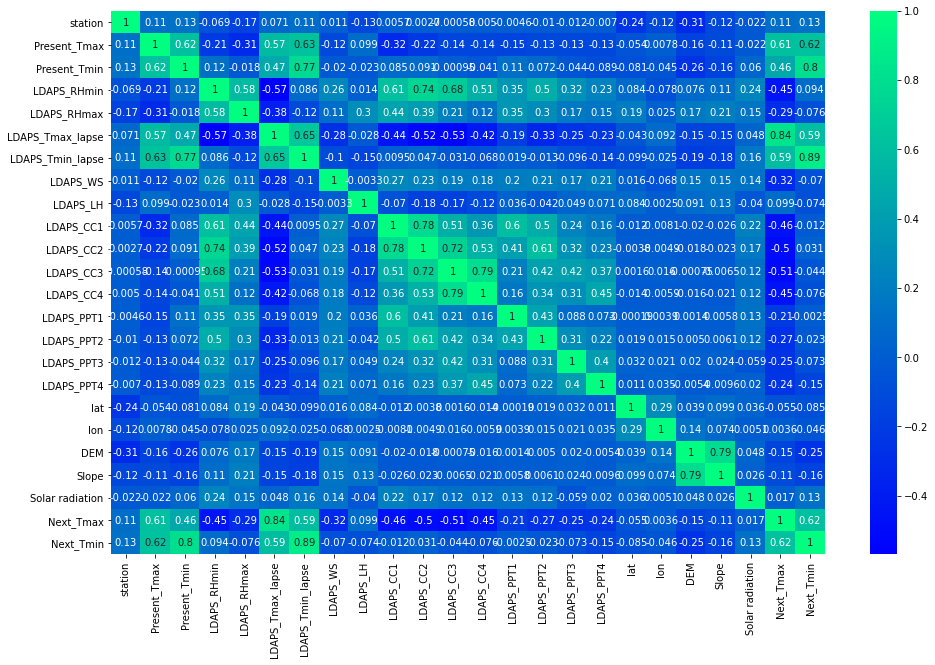

In [119]:
# correlation using heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_cor,annot=True,cmap='winter')

In [24]:
df.shape

(7588, 24)

In [25]:
collist=df.columns.values
ncol=17
nrow=10

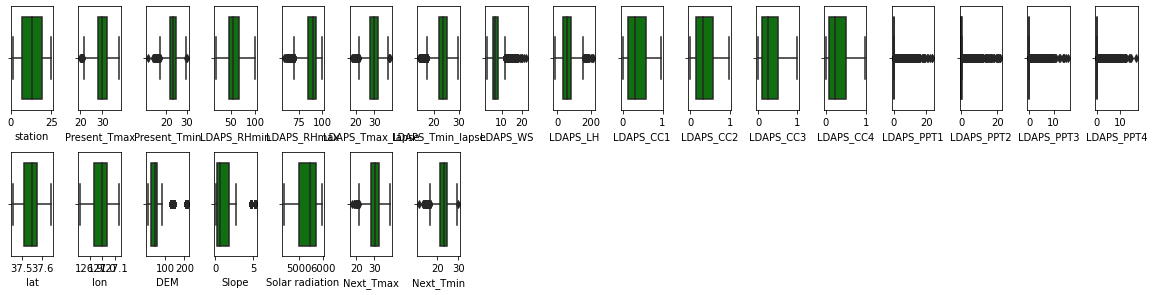

In [26]:
# visualisation with boxplot
plt.figure(figsize=(16,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

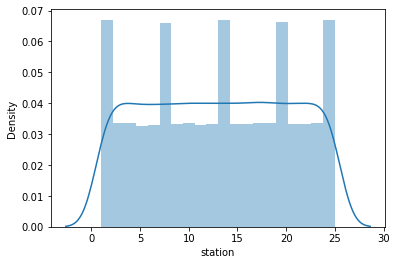

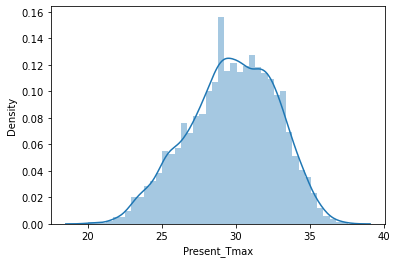

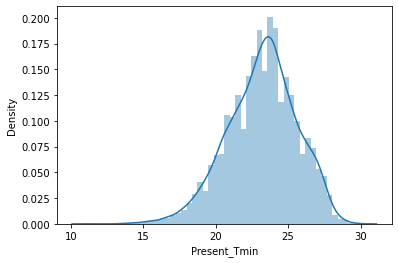

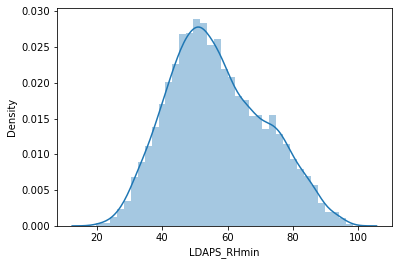

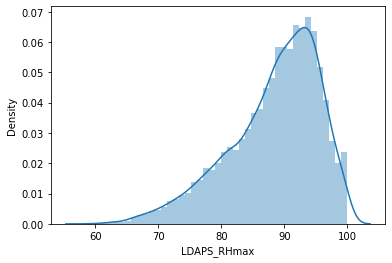

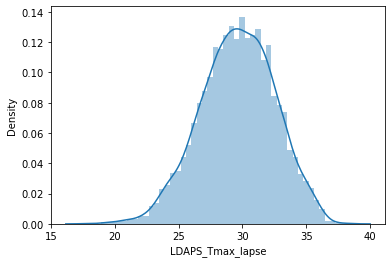

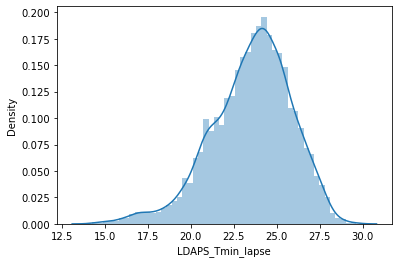

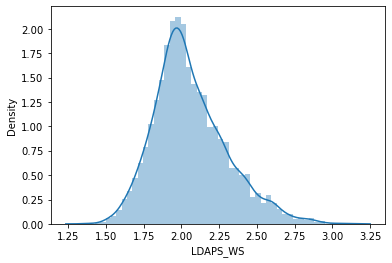

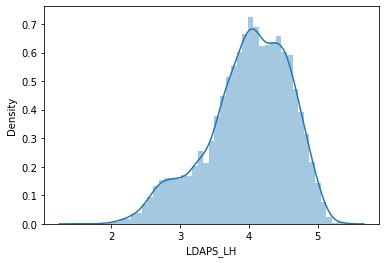

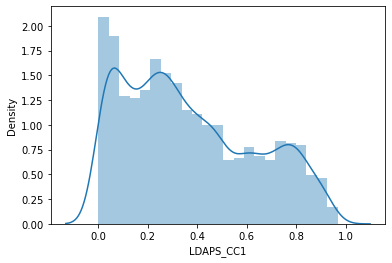

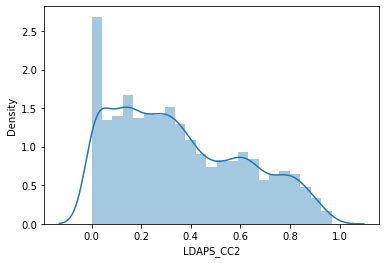

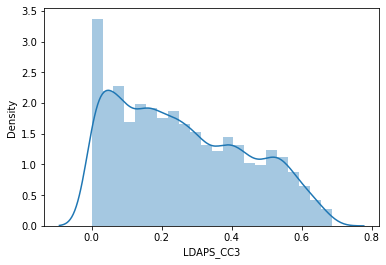

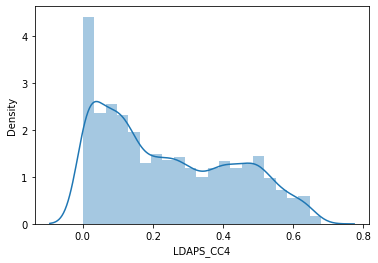

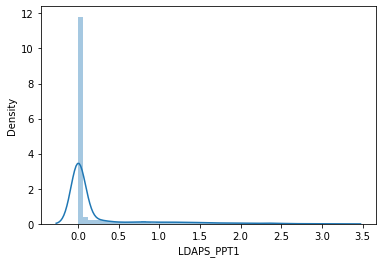

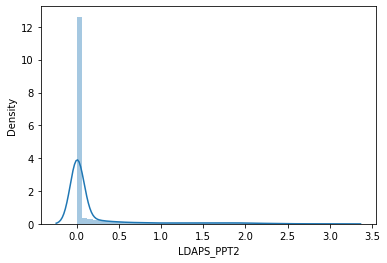

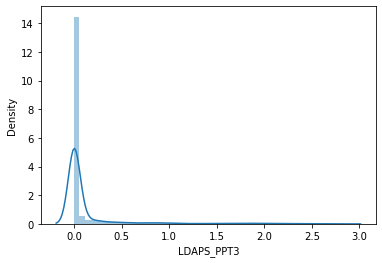

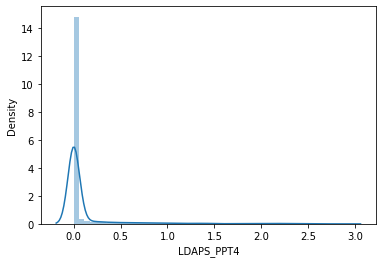

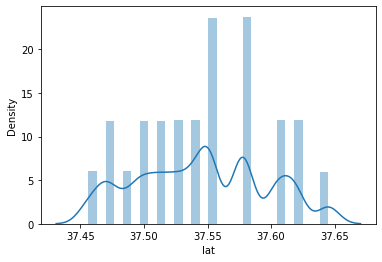

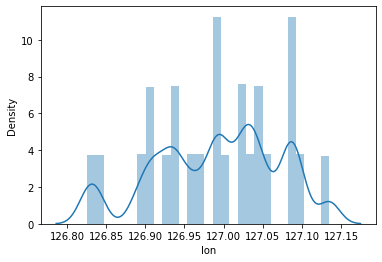

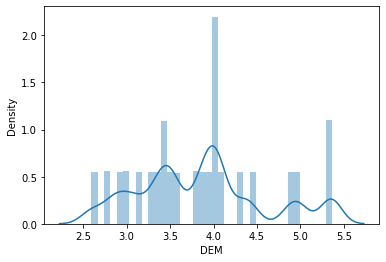

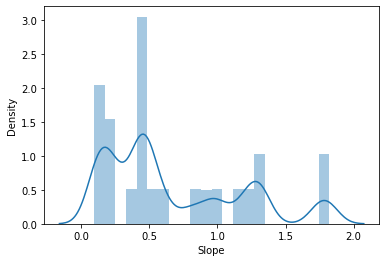

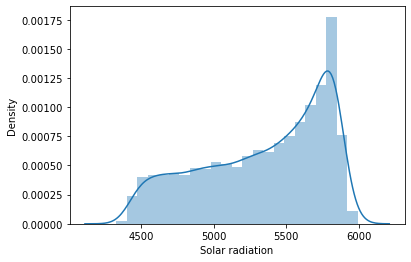

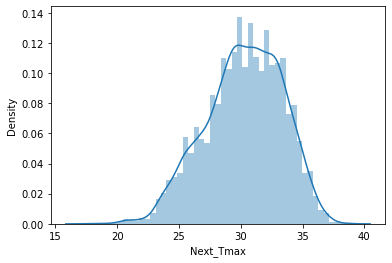

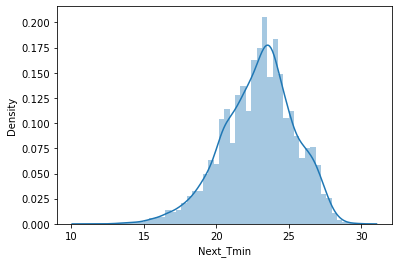

In [120]:
# distribution plot
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [28]:
#Checking skewness of data
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [29]:
#Treating skewness via log method

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [30]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            0.681138
LDAPS_LH           -0.621184
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.388007
LDAPS_CC4           0.441501
LDAPS_PPT1          2.742772
LDAPS_PPT2          3.176107
LDAPS_PPT3          3.998494
LDAPS_PPT4          4.196452
lat                 0.085377
lon                -0.289048
DEM                 0.443612
Slope               0.833888
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [31]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)

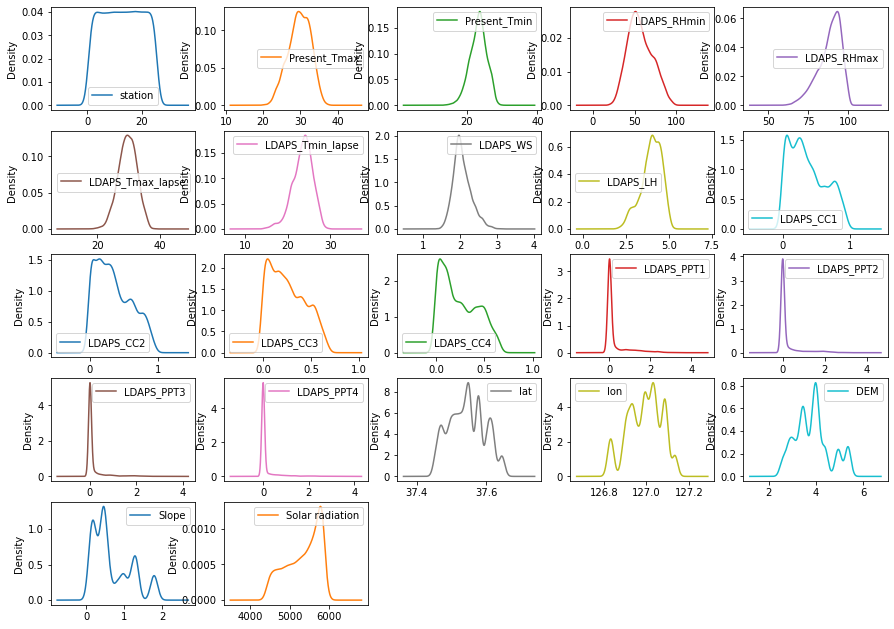

In [32]:
# checking the distribution plot.

x.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, figsize=(15,11))
plt.show()

We can check the distribution of each independent variable.
The skewness is not more or less than +/-3.

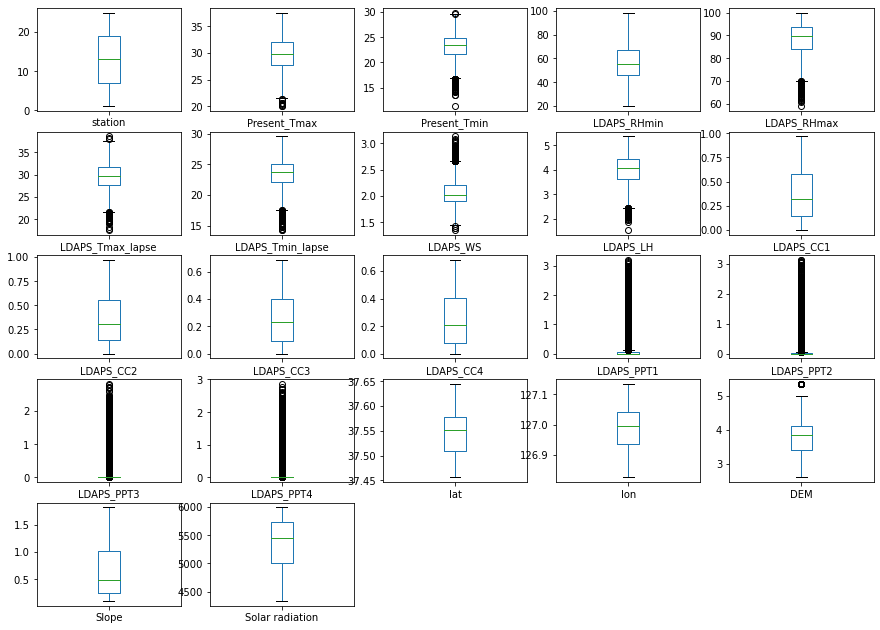

In [33]:
# checking boxplot for outliers.

x.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=True, figsize=(15,11))
plt.show()

As we can see in LDAPS_PPT1 to LDAPS_PPT4 the box plot is more concentrated in 0, this is because the precipitaion in area is very less.
Present_Tmax and Present_Tmin correspond to the present day air temperature, the maximum air temp less than  20  and minimum air temp less than 17 . Hence there is no ooutliers present in this column.



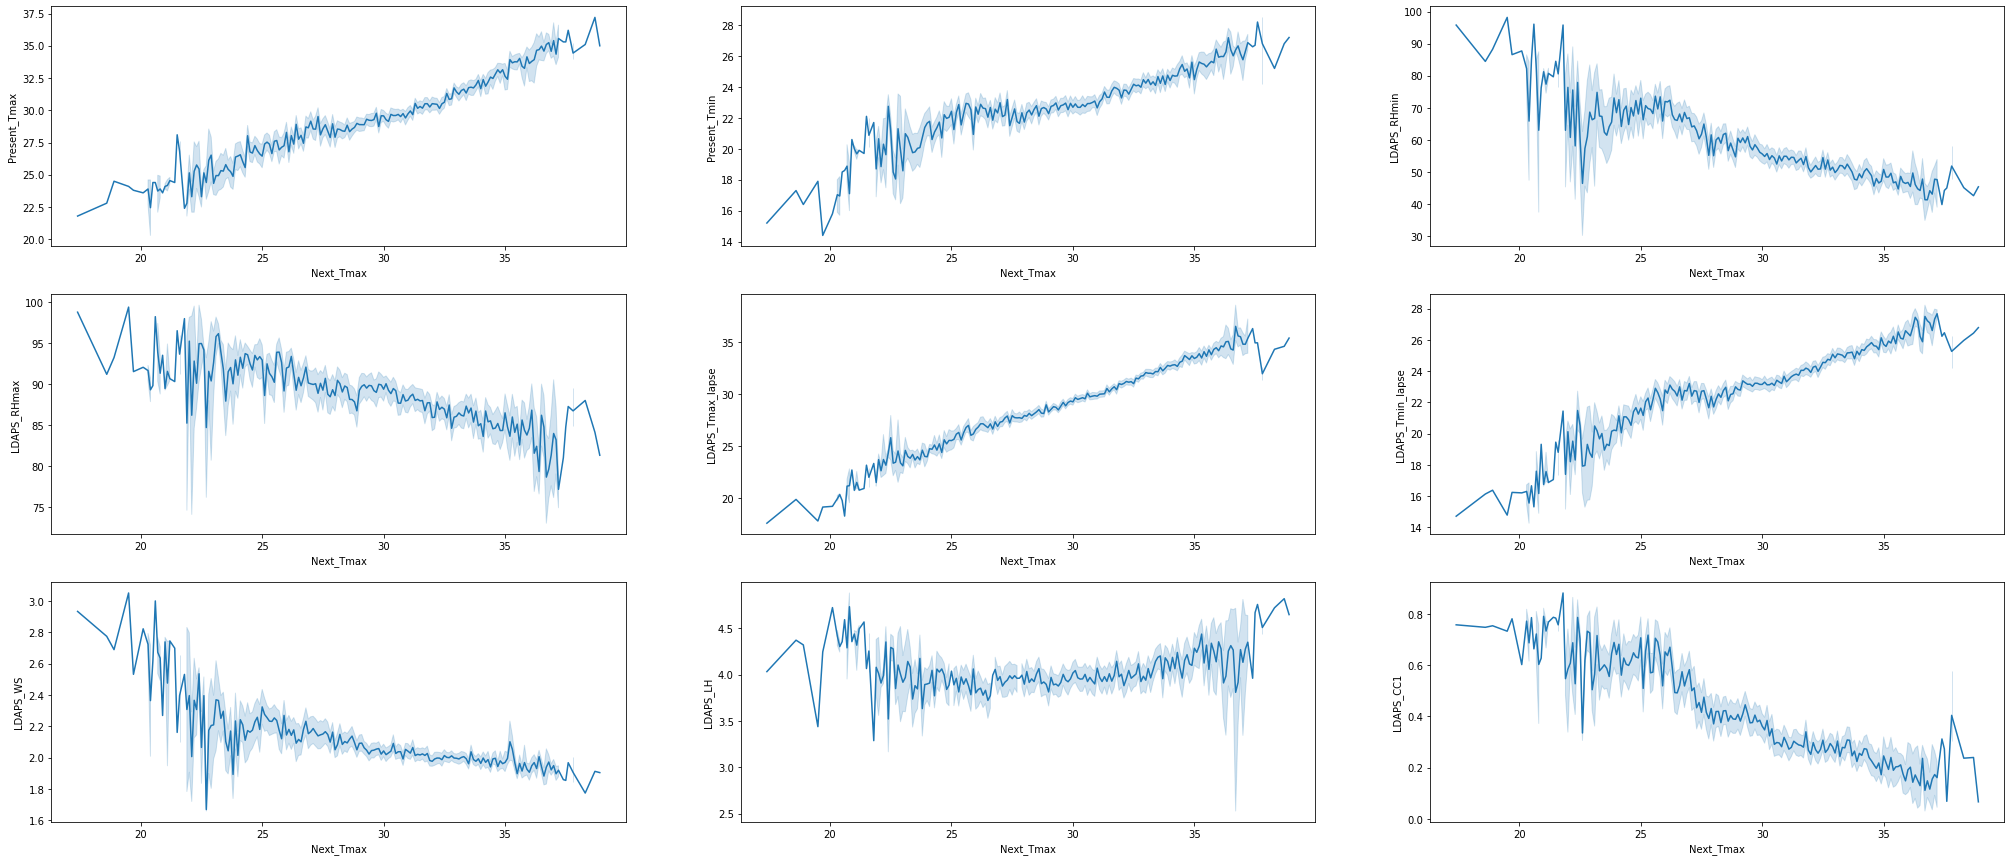

In [34]:
fig,ax=plt.subplots(3,3,figsize=(35,15))
sns.lineplot(y=df['Present_Tmax'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['Present_Tmin'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_RHmin'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_RHmax'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_Tmax_lapse'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_Tmin_lapse'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_WS'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['LDAPS_LH'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['LDAPS_CC1'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()

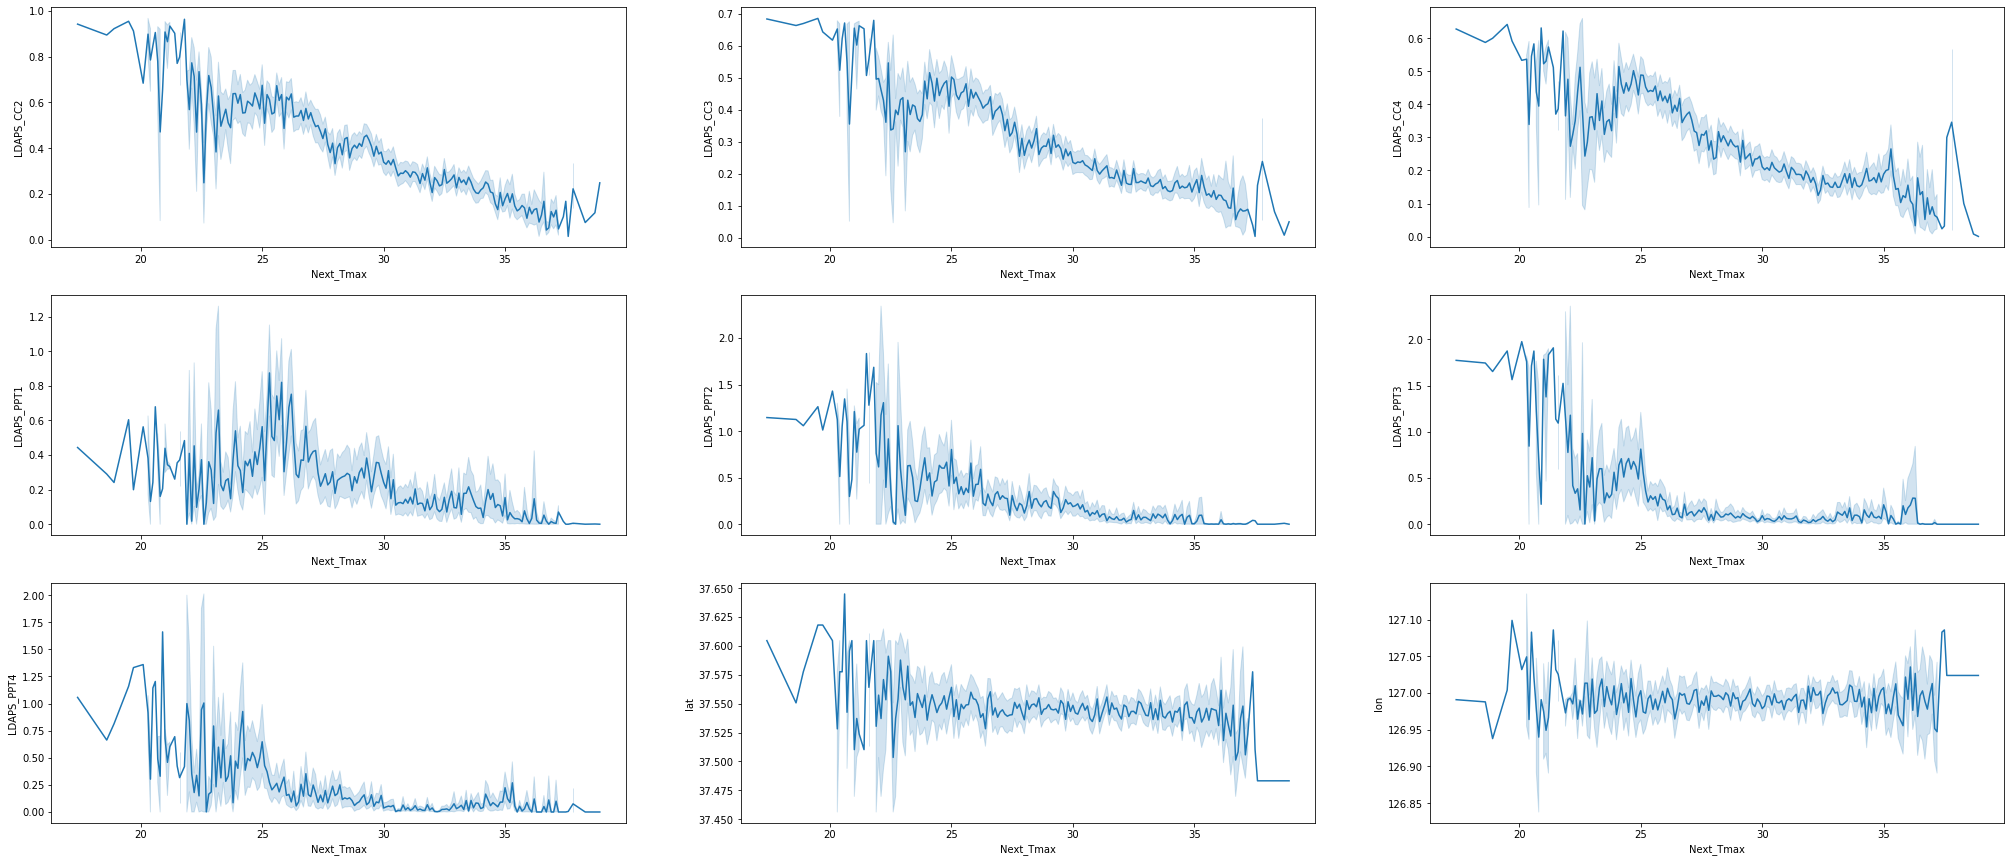

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(35,15))
sns.lineplot(y=df['LDAPS_CC2'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['LDAPS_CC3'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['LDAPS_CC4'], x=df['Next_Tmax'],ax=ax[0,2])
sns.lineplot(y=df['LDAPS_PPT1'], x=df['Next_Tmax'],ax=ax[1,0])
sns.lineplot(y=df['LDAPS_PPT2'], x=df['Next_Tmax'],ax=ax[1,1])
sns.lineplot(y=df['LDAPS_PPT3'], x=df['Next_Tmax'],ax=ax[1,2])
sns.lineplot(y=df['LDAPS_PPT4'], x=df['Next_Tmax'],ax=ax[2,0])
sns.lineplot(y=df['lat'], x=df['Next_Tmax'],ax=ax[2,1])
sns.lineplot(y=df['lon'], x=df['Next_Tmax'],ax=ax[2,2])
plt.show()


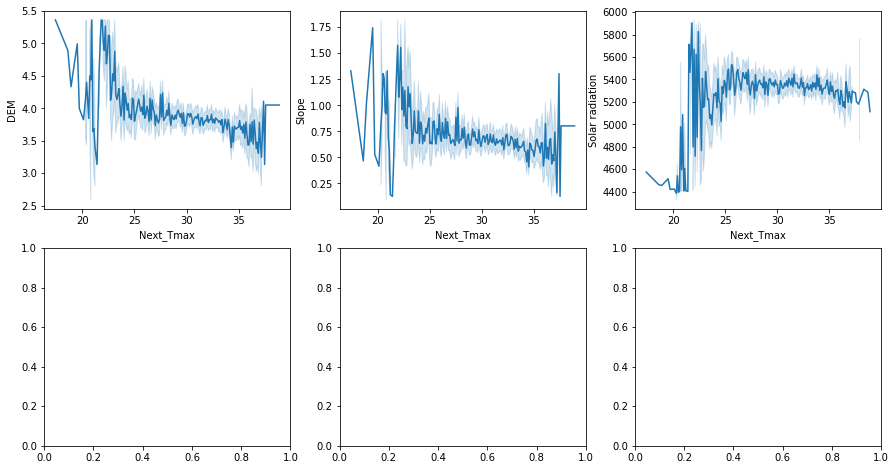

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))
sns.lineplot(y=df['DEM'], x=df['Next_Tmax'],ax=ax[0,0])
sns.lineplot(y=df['Slope'], x=df['Next_Tmax'],ax=ax[0,1])
sns.lineplot(y=df['Solar radiation'], x=df['Next_Tmax'],ax=ax[0,2])
plt.show()

In [37]:
# importing module for model development.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn import metrics

In [38]:
# defining variable for train test split.
df.reset_index(drop=True, inplace=True)
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [79]:
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7583     21.0          23.1          17.8    24.688997    78.261383   
7584     22.0          22.5          17.4    30.094858    83.690018   
7585     23.0          23.3          17.1    26.741310    78.869858   
7586     24.0          23.3          17.7    24.040634    77.294975   
7587     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  2.056542  4.254929   0.233947   
1            29.850689         24.035009  1.900896  3.969111   0.225508   
2            30.091292         24.565633  1.965464  3.071445   0.209344   
3            29.704629         23.326177  1.894624  4.200612   0.216372   
4            29.113934         23.486480  1.907318  4.691032   0.151407   
...                ...               ...       ...       ...        ...   
7583         27.812697         18.303014  2.028576  2.362181   0.052902   
7584         26.704905         17.814038  1.912218  4.420607   0.066461   
7585         26.352081         18.775678  1.966961  4.291258   0.030034   
7586         27.010193         18.733519  2.020596  3.876219   0.035874   
7587         27.939516         18.522965  2.114961  2.311548   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.498817e-01   0.123039         0.0         0.0         0.0   
1      0.251771  1.479406e-01   0.120204         0.0         0.0         0.0   
2      0.257469  1.857253e-01   0.132891         0.0         0.0         0.0   
3      0.226002  1.494173e-01   0.125970         0.0         0.0         0.0   
4      0.249995  1.645754e-01   0.157022         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7583   0.030169  0.000000e+00   0.004370         0.0         0.0         0.0   
7584   0.024518  5.849998e-07   0.017523         0.0         0.0         0.0   
7585   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7586   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7587   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  
0            0.0  37.6046  126.991  5.362864  1.331046      5992.895996  
1            0.0  37.6046  127.032  3.823463  0.414821      5869.312500  
2            0.0  37.5776  127.058  3.535344  0.235941      5863.555664  
3            0.0  37.6450  127.022  3.844087  1.262657      5856.964844  
4            0.0  37.5507  127.135  3.584574  0.409125      5859.552246  
...          ...      ...      ...       ...       ...              ...  
7583         0.0  37.5507  127.040  3.306813  0.452412      4456.024414  
7584         0.0  37.5102  127.086  3.134050  0.125045      4441.803711  
7585         0.0  37.5372  126.891  2.808655  0.144447      4443.313965  
7586         0.0  37.5237  126.909  2.906661  0.200734      4438.373535  
7587         0.0  37.5237  126.970  3.024534  0.240040      4451.345215  

[7588 rows x 22 columns]

In [80]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [81]:
x_scaled

array([[-1.66460654, -0.35331763, -0.74802891, ...,  2.06089459,
         1.30510263,  1.51056517],
       [-1.52605214,  0.72513836, -0.66472063, ..., -0.04023283,
        -0.51031082,  1.22299734],
       [-1.38749775,  0.62403311,  0.0433998 , ..., -0.43348658,
        -0.86474459,  1.20960169],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ..., -1.42534283,
        -1.04603279, -2.09517477],
       [ 1.52214457, -2.17321212, -2.28923218, ..., -1.29157563,
        -0.93450393, -2.10667071],
       [ 1.66069897, -2.20691387, -2.41419461, ..., -1.13069096,
        -0.85662342, -2.07648676]])

In [82]:
#splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=340)
y_train.head()

Next_Tmax  Next_Tmin
5776       36.8       27.2
3356       22.0       18.6
6888       32.9       26.2
3398       32.5       22.6
6451       29.8       23.1

In [83]:
print(x_train.shape,'\t',x_test.shape)

(5311, 22) 	 (2277, 22)


In [84]:
print(y_train.shape,'\t',y_test.shape)

(5311, 2) 	 (2277, 2)


In [87]:
# creating train test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [88]:
# building the first model with Linear Regression.
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)

# # printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], predlr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], predlr[:,-2]))))

RMSE: 0.9980186019507682
RMSE: 1.446952344919344


Text(0, 0.5, 'Predictions')

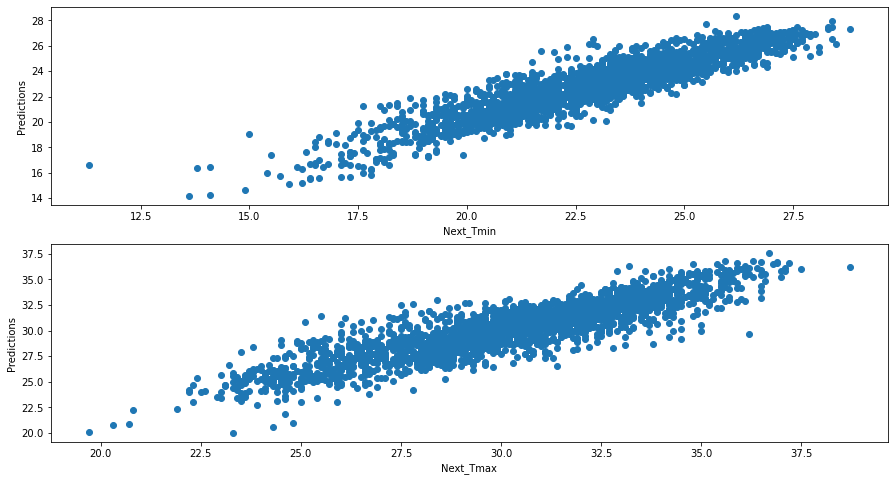

In [90]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], predlr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], predlr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [91]:
# creating second model using decision tree regressor.
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_dtr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_dtr[:,-2]))))

RMSE: 1.2296512354069398
RMSE: 1.55478775203778


Text(0, 0.5, 'Predictions')

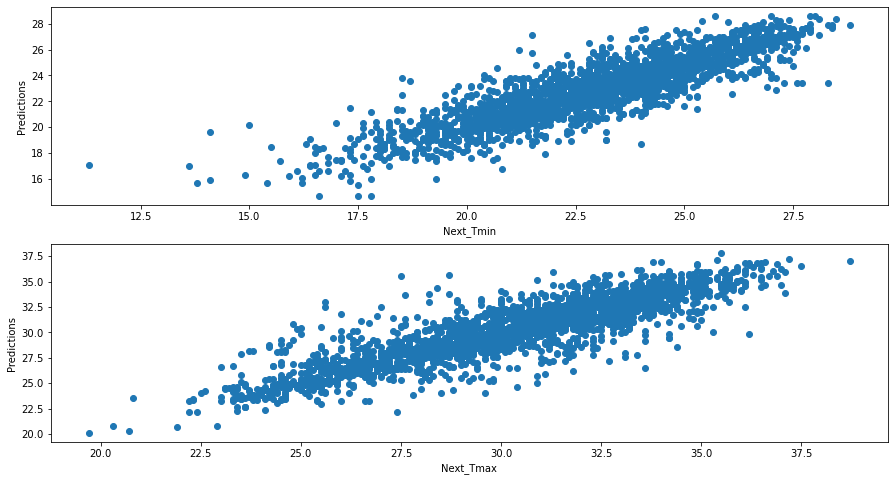

In [92]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_dtr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_dtr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [93]:
# creating third model using random K-Neighbors
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_knn[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_knn[:,-2]))))

RMSE: 1.45927078846934
RMSE: 1.92042970231818


Text(0, 0.5, 'Predictions')

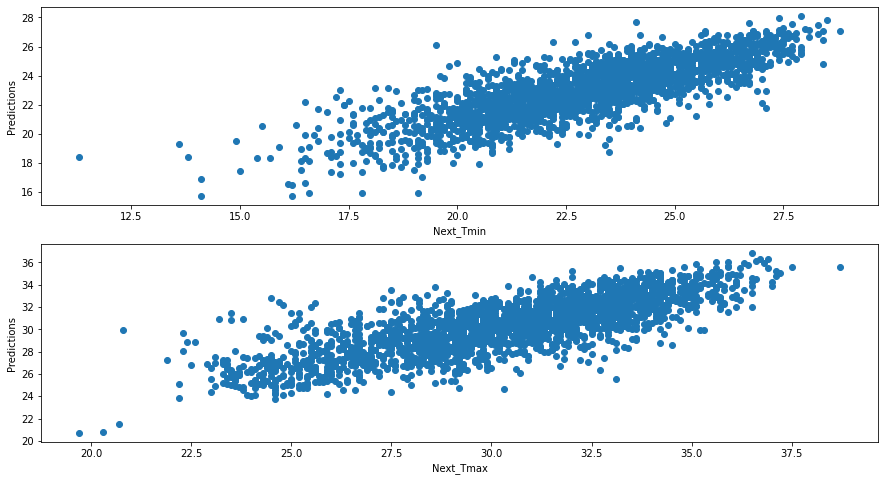

In [94]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_knn[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_knn[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [95]:
# defining base model
svr = LinearSVR()

#define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(svr)
wrapper.fit(x_train, y_train)
pred_svr = wrapper.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], pred_svr[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], pred_svr[:,-2]))))

RMSE: 1.2836893972151429
RMSE: 1.927090227843542


Text(0, 0.5, 'Predictions')

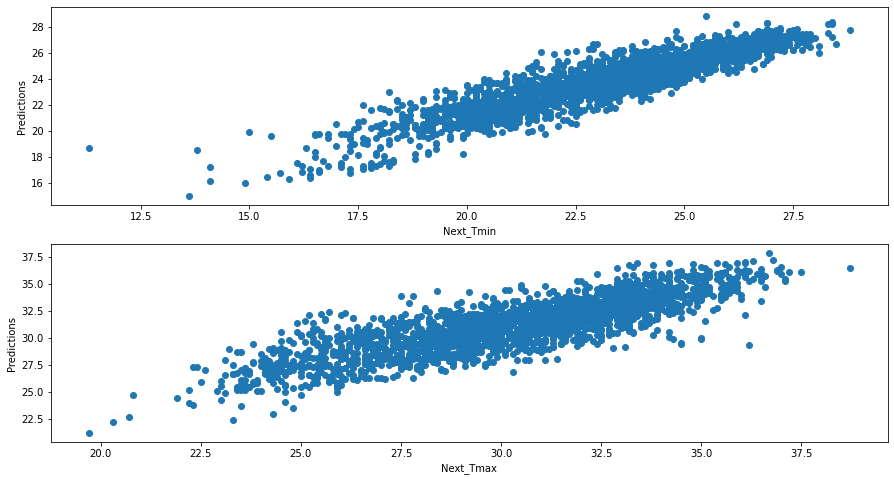

In [96]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], pred_svr[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], pred_svr[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

## Checking cross val score

In [97]:
#importing cross val score module
from sklearn.model_selection import cross_val_score
# imporing kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [98]:
# using cross val for Linear Regression model.
lr_cv = cross_val_score(LinearRegression(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(lr_cv.mean())
print(result)

1.2916055786805458


In [99]:
# using cross val for decision tree regressor
dtr_cv = cross_val_score(DecisionTreeRegressor(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(dtr_cv.mean())
print(result)

1.8984308129629568


In [100]:
# using cross val for K-Neighbors Regressor
knn_cv = cross_val_score(KNeighborsRegressor(), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(knn_cv.mean())
print(result)

2.254036689373906


In [101]:
# using cross val for Support vector regressor
svr_cv = cross_val_score(MultiOutputRegressor(LinearSVR()), x, y, cv=kfold, scoring='neg_root_mean_squared_error')
result = np.absolute(svr_cv.mean())
print(result)

1.9300898766613748


###  by observing linear regression gives least score 

## Hyperparameter tuning

In [102]:
# importing grid search cv
from sklearn.model_selection import GridSearchCV

In [107]:
# creating parameters for the tuning
param_grid = {'fit_intercept':['True', 'False'],
             'normalize':['True', 'False'],
             'n_jobs':['None', 1],
             'copy_X':['True', 'False']}

In [108]:
# passing the created parameters to GridSearchCV
GCV = GridSearchCV(LinearRegression(), param_grid, cv=kfold)
GCV.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': ['None', 1],
                         'normalize': ['True', 'False']})

In [106]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [109]:
#getting best parameters
GCV.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'n_jobs': 'None',
 'normalize': 'True'}

In [110]:
# building the model with best parameters
tuned_model = LinearRegression(fit_intercept=True, n_jobs=None, normalize=True, copy_X=True)
tuned_model.fit(x_train, y_train)
prediction = tuned_model.predict(x_test)

# printing root mean square for the first target variable Next_Tmin
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-1], prediction[:,-1]))))

# printing root mean square for the second target variable Next_Tmax
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test.iloc[:,-2], prediction[:,-2]))))

RMSE: 0.998018601950768
RMSE: 1.4469523449193449


Text(0, 0.5, 'Predictions')

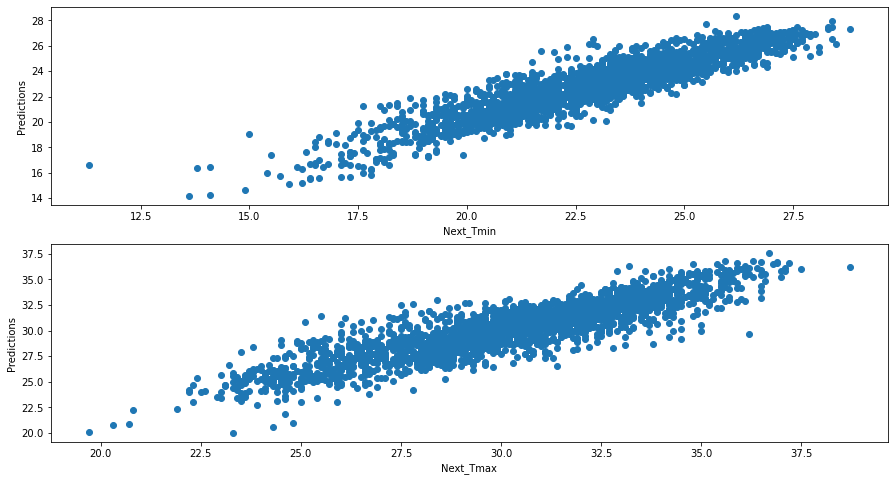

In [111]:
# plotting scatter plot between the predictions and real values
fig, axs = plt.subplots(2, figsize=(15,8))
axs[0].scatter(y_test.iloc[:,-1], prediction[:,-1])
axs[0].set_xlabel('Next_Tmin')
axs[0].set_ylabel('Predictions')
axs[1].scatter(y_test.iloc[:,-2], prediction[:,-2])
axs[1].set_xlabel('Next_Tmax')
axs[1].set_ylabel('Predictions')

In [112]:
result = pd.DataFrame({'Prediction(Next_Tmin)':prediction[:,-1],
                     'Next_Tmin':y_test.iloc[:,-1],
                     'Prediction(Next_Tmax)':prediction[:,-2],
                     'Next_Tmax':y_test.iloc[:,-2]})

In [113]:
result

Prediction(Next_Tmin)  Next_Tmin  Prediction(Next_Tmax)  Next_Tmax
5090              23.284704       23.8              32.568112       31.4
995               25.089918       25.5              32.667350       29.6
3106              20.564814       20.7              29.376016       28.6
938               24.502872       25.3              32.912135       33.4
3430              24.122166       23.1              34.372044       35.0
...                     ...        ...                    ...        ...
7104              24.430677       24.6              32.294740       33.1
2167              20.497019       21.3              31.682625       29.9
4234              20.869228       19.0              32.661752       32.7
2937              20.172949       21.5              29.316895       28.6
1853              22.027595       22.1              30.100694       31.3

[2277 rows x 4 columns]

In [ ]:
Saving our model

In [114]:
import joblib
joblib.dump(tuned_model,'TemperatureForecast.pkl')

['TemperatureForecast.pkl']

In [115]:
save = joblib.load('TemperatureForecast.pkl')
prediction = save.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

Mean Absolute Error: 0.9395281996734162
Mean Squared Error: 1.5448561091536779
Root Mean Squared Error: 1.242922406730878


In [116]:
prediction

array([[32.56811181, 23.28470445],
       [32.66734979, 25.08991772],
       [29.37601589, 20.56481404],
       ...,
       [32.66175237, 20.86922789],
       [29.31689491, 20.17294915],
       [30.10069361, 22.02759478]])